In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data-cleaned.csv')

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Categorical to Dummy

In [29]:
df_dum = pd.get_dummies(df)

In [30]:
df_dum.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [112]:
X = df_dum.drop('stroke', axis = 1)
y = df_dum.stroke.values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [57]:
LR = LogisticRegression()
#LR.fit(X_train, y_train)

In [55]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

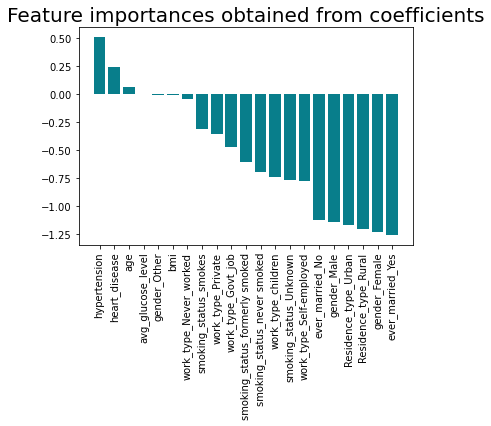

In [56]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score

In [63]:
np.mean(cross_val_score(LR, X_train, y_train, cv = 5))

0.9604010547455276

### Tune Logistic Regression GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
parameters = {'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'), 'penalty':('l1', 'l2', 'elasticnet', None), 'multi_class':('auto', 'ovr', 'multinomial')}

In [69]:
gs = GridSearchCV(LR, parameters, cv=5)

In [70]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ('auto', 'ovr', 'multinomial'),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [71]:
gs.best_score_

0.9604010547455276

In [72]:
gs.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [73]:
ypred_LR = gs.best_estimator_.predict(X_test)

### Test Results Logistic Regression

In [74]:
from sklearn.metrics import confusion_matrix

In [77]:
cm = confusion_matrix(y_test, ypred_LR)

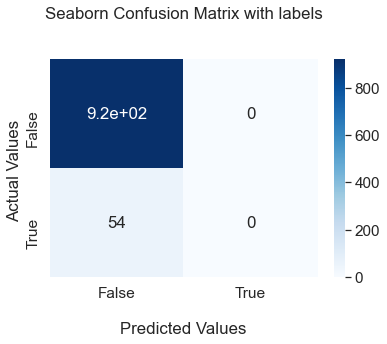

In [80]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Metrics Logistic Regression

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [83]:
print("Precision")
precision_score(y_test, ypred_LR)

Precision


0.0

In [84]:
print("Recall")
recall_score(y_test, ypred_LR)

Recall


0.0

In [87]:
print("F1 Score")
f1_score(y_test, ypred_LR)

F1 Score


0.0

In [88]:
print("Accuracy")
accuracy_score(y_test, ypred_LR)

Accuracy


0.9445015416238438

## Data Scaled Logistic Regression

In [89]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [96]:
gs = GridSearchCV(LR, parameters, cv=5)

In [97]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ('auto', 'ovr', 'multinomial'),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [98]:
gs.best_score_

0.9604010547455276

In [99]:
gs.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [100]:
ypred_LR_Scaled = gs.best_estimator_.predict(X_test_scaled)

### Test Result Scaled

In [101]:
cm = confusion_matrix(y_test, ypred_LR_Scaled)

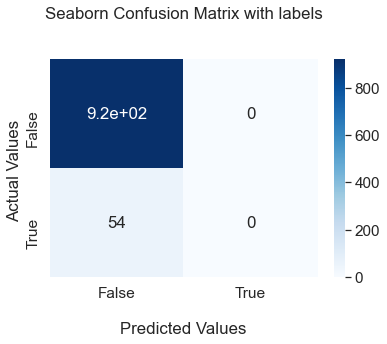

In [102]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [103]:
print("Precision")
print(precision_score(y_test, ypred_LR))
print("Recall")
print(recall_score(y_test, ypred_LR))
print("F1 Score")
print(f1_score(y_test, ypred_LR))
print("Accuracy")
print(accuracy_score(y_test, ypred_LR))

Precision
0.0
Recall
0.0
F1 Score
0.0
Accuracy
0.9445015416238438


### Support Vector Machine

In [106]:
from sklearn.svm import SVC

In [115]:
clf = SVC()
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'gamma':('scale', 'auto'), 'decision_function_shape':('ovo', 'ovr')}

In [116]:
gs_SVC = GridSearchCV(clf, parameters)

In [117]:
gs_SVC.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'decision_function_shape': ('ovo', 'ovr'),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [118]:
gs_SVC.best_score_

0.9601439853367874

In [119]:
gs_SVC.best_estimator_

SVC(decision_function_shape='ovo', kernel='linear')

### Test SVM

In [121]:
ypred_clf_gs = gs.best_estimator_.predict(X_test)

In [122]:
cm = confusion_matrix(y_test, ypred_clf_gs)

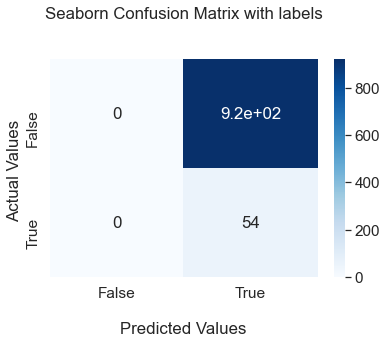

In [123]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [126]:
SVC_ = SVC(decision_function_shape='ovo', kernel='linear')

In [129]:
SVC_.fit(X_train, y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [127]:
cross_val_score(SVC_, X_train, y_train, cv = 5)

array([0.96015424, 0.96015424, 0.96015424, 0.96015424, 0.96010296])

In [130]:
ypred_SVC_ = SVC_.predict(X_test)

In [131]:
print("Precision")
print(precision_score(y_test, ypred_SVC_))
print("Recall")
print(recall_score(y_test, ypred_SVC_))
print("F1 Score")
print(f1_score(y_test, ypred_SVC_))
print("Accuracy")
print(accuracy_score(y_test, ypred_SVC_))

Precision
0.0
Recall
0.0
F1 Score
0.0
Accuracy
0.9445015416238438


### Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
RF = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)

In [135]:
cm = confusion_matrix(y_test, y_pred_RF)

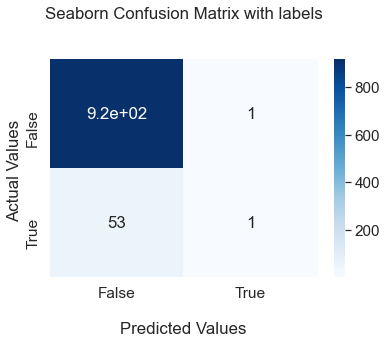

In [136]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [134]:
print("Precision")
print(precision_score(y_test, y_pred_RF))
print("Recall")
print(recall_score(y_test, y_pred_RF))
print("F1 Score")
print(f1_score(y_test, y_pred_RF))
print("Accuracy")
print(accuracy_score(y_test, y_pred_RF))

Precision
0.5
Recall
0.018518518518518517
F1 Score
0.03571428571428571
Accuracy
0.9445015416238438


#### Tune Random Forest

In [151]:
RF = RandomForestClassifier()
parameters = {'n_estimators':range(100,200,10), 'criterion':('gini', 'entropy', 'log_loss'), 'max_features':('sqrt', 'log2', None), 'class_weight':('balanced', 'balanced_subsample')}

In [152]:
gs = GridSearchCV(RF, parameters, cv=5, verbose=1)

In [153]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ('balanced', 'balanced_subsample'),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_features': ('sqrt', 'log2', None),
                         'n_estimators': range(100, 200, 10)},
             verbose=1)

In [156]:
gs.best_score_

0.9601439853367874

In [158]:
ypred_RF = gs.best_estimator_.predict(X_test)

In [159]:
cm = confusion_matrix(y_test, y_pred_RF)

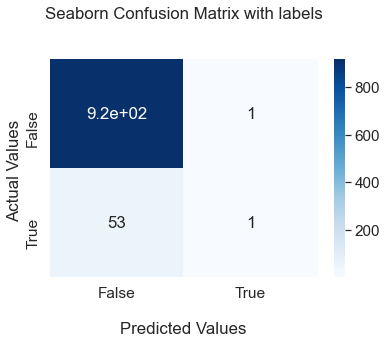

In [160]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Subsample 

In [161]:
df['stroke'].apply(lambda x:)

0       1
1       1
2       1
3       1
4       1
       ..
4857    0
4858    0
4859    0
4860    0
4861    0
Name: stroke, Length: 4862, dtype: int64

In [177]:
import random

In [218]:
df_stroke_1 = df[df['stroke'] == 1].reset_index().drop('index', axis = 1)
df_stroke_0 = df[df['stroke'] == 0].reset_index().drop('index', axis = 1)

In [215]:
df_stroke_1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
204,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
205,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
206,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
207,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [219]:
df_stroke_0

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4648,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4649,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4650,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4651,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [220]:
##Buscar en solo los que tienen stroke = 0
for i in range(df_stroke_0.shape[0]):
    ran = random.randint(0,14)
    if ran != 5:
        df_stroke_0 = df_stroke_0.drop(i)

In [221]:
df_stroke_0

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
10,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,Unknown,0
41,Male,13.0,0,0,No,children,Urban,114.84,18.3,Unknown,0
45,Female,22.0,0,0,No,Private,Rural,79.81,27.7,Unknown,0
56,Male,43.0,0,0,Yes,Private,Urban,146.01,31.5,smokes,0
68,Female,37.0,1,0,Yes,Self-employed,Rural,127.71,36.0,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4614,Male,21.0,0,0,No,Private,Urban,138.51,24.3,never smoked,0
4619,Female,35.0,0,0,Yes,Private,Rural,58.72,40.0,smokes,0
4633,Female,51.0,0,0,Yes,Private,Urban,152.56,21.8,Unknown,0
4636,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0


In [226]:
new_df = pd.concat([df_stroke_0,df_stroke_1]).reset_index().drop('index', axis = 1)

In [225]:
new_df.to_csv("healthcare-dataset-stroke-data-cleaned-subsample.csv")

NameError: name 'new_df' is not defined